# Naive Bayes classifier

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [4]:
ds = load_breast_cancer()
x = ds.data
y = ds.target

In [5]:
x[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [6]:
y[0]

np.int64(0)

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 47)
model = GaussianNB()

In [8]:
model.fit(xtrain, ytrain)

GaussianNB()

In [11]:
ypred = model.predict(xtest)
acc = accuracy_score(ypred, ytest)
conf = confusion_matrix(ypred, ytest)
print(acc, "\n",conf)

0.9230769230769231 
 [[49  4]
 [ 7 83]]


### Multinomial NB

In [29]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

In [24]:
ds = fetch_20newsgroups(subset = 'all')
x = ds.data
y = ds.target

In [25]:
ds.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [26]:
x[0], y[0]

("From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 np.int64(10))

In [27]:
len(x)

18846

In [30]:
vect1 = CountVectorizer(binary = True)
vect2 = CountVectorizer(binary = False)

x1 = vect1.fit_transform(x)
x2 =  vect2.fit_transform(x)

In [31]:
xtrain1, xtest1, ytrain, ytest = train_test_split(x1, y, test_size = 0.25, random_state = 7)
xtrain2, xtest2, ytrain, ytest = train_test_split(x2, y, test_size = 0.25, random_state = 7)

In [33]:
bnb = BernoulliNB()
mnb = MultinomialNB()

In [34]:
bnb.fit(xtrain1, ytrain)
mnb.fit(xtrain2, ytrain)

MultinomialNB()

In [35]:
ypred1 = bnb.predict(xtest1)
ypred2 = mnb.predict(xtest2)

In [36]:
acc1 = accuracy_score(ypred1, ytest)
acc2 = accuracy_score(ypred2, ytest)

In [37]:
acc1, acc2

(0.6910016977928692, 0.8452886247877759)

### Trial with TF-IDF Vectorizer

In [40]:
vect3 = TfidfVectorizer(binary=False)
x3 = vect3.fit_transform(x)

xtrain3, xtest3, ytrain, ytest = train_test_split(x3, y, test_size = 0.25, random_state = 7)

In [41]:
mnb = MultinomialNB()
mnb.fit(xtrain3, ytrain)
ypred3 = mnb.predict(xtest3)
acc3 = accuracy_score(ypred3, ytest)
print(acc3)

0.8435908319185059


### Decision Tree Classifier on Titanic Dataset

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
# Preprocess the data
data = data[['Pclass', 'Sex', 'Age','SibSp','Parch', 'Fare','Embarked','Survived']].dropna()
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex'
data['Embarked'] = data['Embarked'].map({'S':3, 'C':2, 'Q':1})

In [50]:
data.Embarked.unique()

array([3, 2, 1])

In [60]:
from sklearn.preprocessing import MinMaxScaler
X = data[['Pclass', 'Sex', 'Age','SibSp','Parch', 'Fare','Embarked']]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = data['Survived']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

Accuracy (Full Tree): 0.7584269662921348


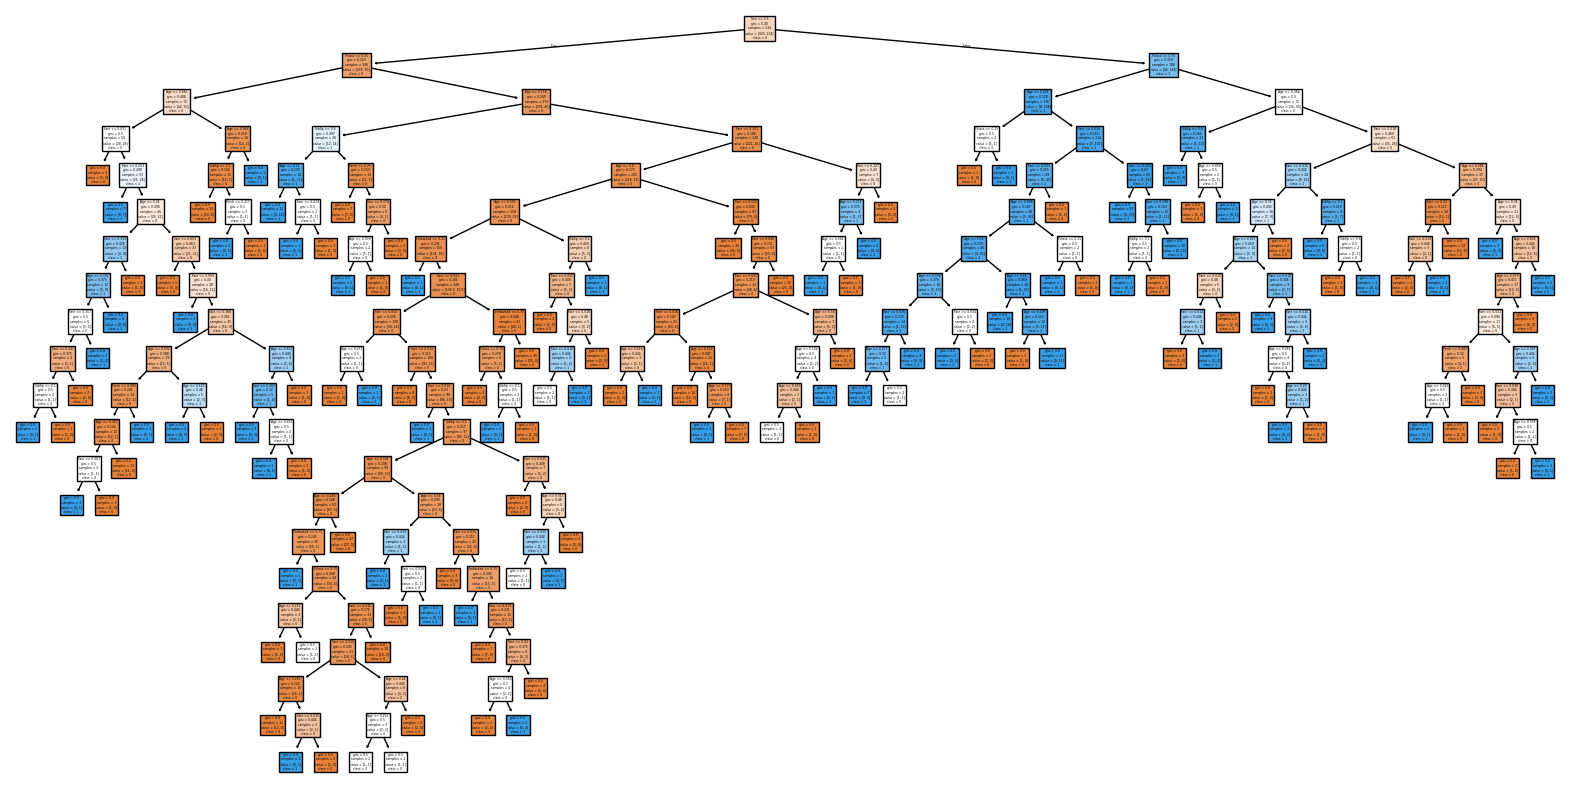

In [61]:
# Train a decision tree without pruning
model = DecisionTreeClassifier(random_state=85)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
print("Accuracy (Full Tree):", accuracy_score(y_test, y_pred))

# Visualize the full tree
plt.figure(figsize = (20,10))
features = data.iloc[:, :-1].columns
classes = [str(i) for i in y.unique()]
plot_tree(model, feature_names=features, class_names=classes, filled = True)
plt.show()